<a href="https://colab.research.google.com/github/samarasimhareddymatla-sys/air-pollution-prediction/blob/main/Air_Quality_Prediction_%26_Pollution_Hotspot_Detection_week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving hyderabad_air_quality_latest (3).csv to hyderabad_air_quality_latest (3).csv
Dataset Loaded Successfully
Shape: (81, 13)
Columns: ['city', 'station_name', 'station_id', 'sensor_id', 'sensor_name', 'parameter', 'value', 'units', 'datetime_utc', 'datetime_local', 'latitude', 'longitude', 'timezone']
  city                                 station_name  station_id  sensor_id  \
0  NaN  Bollaram Industrial Area, Hyderabad - TSPCB        5599   12235395   
1  NaN  Bollaram Industrial Area, Hyderabad - TSPCB        5599   12235396   
2  NaN  Bollaram Industrial Area, Hyderabad - TSPCB        5599   12235397   
3  NaN  Bollaram Industrial Area, Hyderabad - TSPCB        5599   12235398   
4  NaN  Bollaram Industrial Area, Hyderabad - TSPCB        5599   12235399   

  sensor_name parameter  value  units          datetime_utc  \
0      co ppb        co   0.48    ppb  2025-09-13T02:15:00Z   
1      no ppb        no  10.40    ppb  2025-09-13T02:15:00Z   
2     no2 ppb       no2  22.20    pp

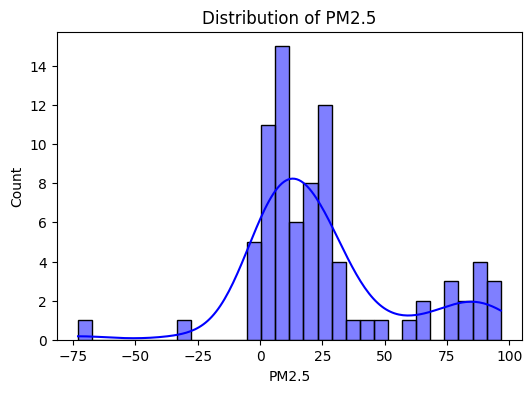

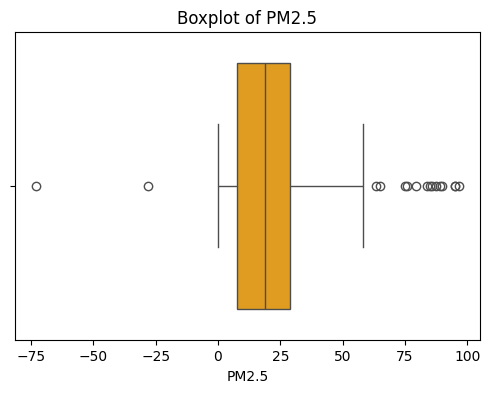

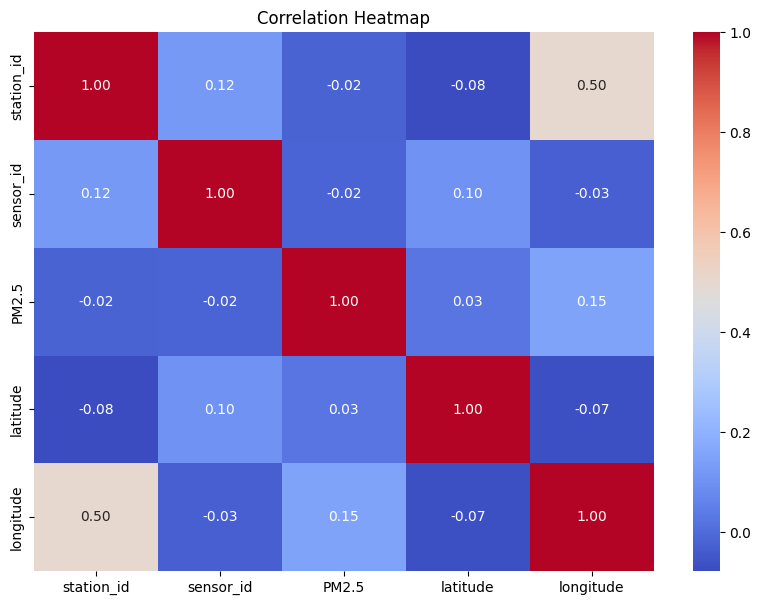


Train-Test Split Done
X_train: (64, 4)
X_test : (17, 4)

Feature Scaling Completed
X_train_scaled shape: (64, 4)
X_test_scaled shape: (17, 4)


In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
print("Dataset Loaded Successfully")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())
# Data Preprocessing
if "value" in df.columns:
    df.rename(columns={"value": "PM2.5"}, inplace=True)
    print("\nRenamed 'value' → 'PM2.5'")
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
df = df.fillna(df.mean(numeric_only=True))
print("\nData Cleaning Completed")
print("Shape after cleaning:", df.shape)
# Exploratory Data Analysis (EDA)
if "PM2.5" in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df["PM2.5"], bins=30, kde=True, color="blue")
    plt.title("Distribution of PM2.5")
    plt.xlabel("PM2.5")
    plt.ylabel("Count")
    plt.show()
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df["PM2.5"], color="orange")
    plt.title("Boxplot of PM2.5")
    plt.show()
plt.figure(figsize=(10,7))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
# Train-Test Split
if "PM2.5" in df.columns:
    X = df.drop("PM2.5", axis=1).select_dtypes(include=[np.number])
    y = df["PM2.5"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    print("\nTrain-Test Split Done")
    print("X_train:", X_train.shape)
    print("X_test :", X_test.shape)
    # Feature Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print("\nFeature Scaling Completed")
    print("X_train_scaled shape:", X_train_scaled.shape)
    print("X_test_scaled shape:", X_test_scaled.shape)
else:
    print("'PM2.5' column not found in dataset")



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
